In [36]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [14]:
AMZN = quandl.get("WIKI/AMZN")

In [15]:
df = AMZN[['Adj. Close']]

In [30]:
forecast_out = int(30) # predicting 30 days into future
df['Prediction'] = df['Adj. Close'].shift(-forecast_out) 
# Label column with data shifting 30 units up

/Users/gcptien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df.head(60)

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000
1997-05-23,1.500000,2.302500
1997-05-27,1.583333,2.323333
1997-05-28,1.531667,2.375000
1997-05-29,1.505000,2.333333


In [40]:
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

In [43]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [45]:
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test,y_test)
print("Confidence:", confidence)

Confidence: 0.987565032129


In [46]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[ 1500.28253062  1539.12683895  1550.51223967  1536.61801116  1557.51782237
  1573.00664483  1574.96268006  1591.16375447  1614.4979791   1603.89924472
  1604.39888416  1584.20069427  1591.42952013  1616.26266306  1631.17743169
  1639.00157261  1646.29418222  1675.02876499  1695.75848619  1684.90461678
  1687.90245338  1678.67506979  1667.36408346  1638.92715823  1683.1293022
  1678.18606099  1638.04481625  1586.44375641  1650.54643273  1588.02771972]


(1400, 1900)

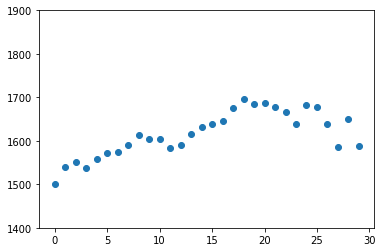

In [54]:
plt.scatter(np.arange(30),forecast_prediction)
plt.ylim(1400,1900)